# AUTOENCODERS

In [5]:
import torch
import torch.nn as nn

# Define a simple fully connected neural network class
class SimpleFCNN(nn.Module):
    def __init__(self):
        super(SimpleFCNN, self).__init__()
        
        # Define a single linear layer since we want a model with only nn.Linear
        # This layer directly maps 4 input features to 4 output features
        self.fc = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        # Pass the input through the fully connected layer
        output = self.fc(x)
        return output

# Instantiate the fully connected neural network
fcnn_model = SimpleFCNN()

# Print the model structure
fcnn_model.state_dict()


OrderedDict([('fc.weight', tensor([[-0.3223,  0.0716]])),
             ('fc.bias', tensor([0.0114]))])

In [2]:
import torch
import torch.nn as nn

# Define a simple autoencoder class
class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super(SimpleAutoencoder, self).__init__()
        
        # Since this model only has input and output layers, and both have 4 neurons,
        # we directly connect them without any hidden layers or compression
        self.encoder = nn.Linear(in_features=4, out_features=4)
        self.decoder = nn.Linear(in_features=4, out_features=4)

    def forward(self, x):
        # Encoding
        encoded = self.encoder(x)
        # Decoding
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the model
model = SimpleAutoencoder()

# Print the model structure
model.state_dict()


OrderedDict([('encoder.weight',
              tensor([[ 0.3309, -0.4868, -0.3303, -0.1680],
                      [ 0.1641, -0.2915,  0.3169,  0.2656],
                      [-0.2445, -0.3950, -0.1286, -0.4354],
                      [ 0.2686, -0.1692,  0.3096, -0.1701]])),
             ('encoder.bias', tensor([ 0.1251,  0.2211,  0.2355, -0.1253])),
             ('decoder.weight',
              tensor([[-0.1430,  0.0767,  0.2469, -0.0333],
                      [-0.1145, -0.3200, -0.2623,  0.0253],
                      [ 0.0284, -0.2398,  0.3292,  0.4865],
                      [ 0.3379,  0.3544,  0.2553,  0.0811]])),
             ('decoder.bias', tensor([-0.4867,  0.1027, -0.3841, -0.2913]))])

Epoch [1], Loss: 0.3521
Epoch [201], Loss: 0.0708
Epoch [401], Loss: 0.0479
Epoch [601], Loss: 0.0386
Epoch [801], Loss: 0.0322
Epoch [1001], Loss: 0.0244
Epoch [1201], Loss: 0.0162
Epoch [1401], Loss: 0.0118
Epoch [1601], Loss: 0.0094
Epoch [1801], Loss: 0.0071
Epoch [2001], Loss: 0.0053
Epoch [2201], Loss: 0.0044
Epoch [2401], Loss: 0.0039
Epoch [2601], Loss: 0.0036
Epoch [2801], Loss: 0.0034
Epoch [3001], Loss: 0.0031
Epoch [3201], Loss: 0.0029
Epoch [3401], Loss: 0.0027
Epoch [3601], Loss: 0.0026
Epoch [3801], Loss: 0.0024
Epoch [4001], Loss: 0.0022
Epoch [4201], Loss: 0.0020
Epoch [4401], Loss: 0.0019
Epoch [4601], Loss: 0.0017
Epoch [4801], Loss: 0.0015
Epoch [5001], Loss: 0.0014
Epoch [5201], Loss: 0.0013
Epoch [5401], Loss: 0.0013
Epoch [5601], Loss: 0.0013
Epoch [5801], Loss: 0.0012
Epoch [6001], Loss: 0.0012
Epoch [6201], Loss: 0.0012
Epoch [6401], Loss: 0.0012
Epoch [6601], Loss: 0.0012
Epoch [6801], Loss: 0.0011
Epoch [7001], Loss: 0.0011
Epoch [7201], Loss: 0.0011
Epoch [7

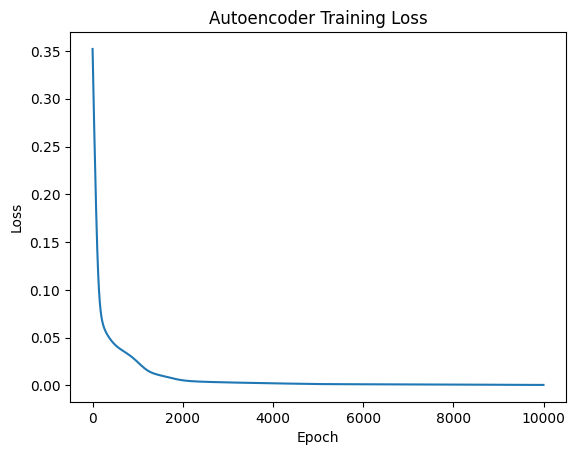

OrderedDict([('encoder.0.weight', tensor([[-0.2985, -0.5488, -0.8609,  0.0186],
        [-0.2296,  1.7202, -0.4502,  0.8622],
        [-2.1323,  0.0362,  0.6688, -0.0542],
        [ 0.0318,  0.4311, -0.5882, -0.5493]])), ('encoder.0.bias', tensor([ 0.9292, -1.8106,  1.3248, -0.0614])), ('decoder.0.weight', tensor([[-0.3472, -0.1198, -1.0738, -0.3162],
        [-0.6869,  1.1415,  0.0114,  1.0410],
        [-1.6802, -0.5308,  0.6121, -0.9965],
        [ 0.5540,  1.4060, -0.3926, -1.5674]])), ('decoder.0.bias', tensor([ 0.9726,  1.7709, -0.2327,  1.0337]))])


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self, num_neurons, inputs, lr, max_epochs, stabilization_threshold, check_interval):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.inputs = inputs
        self.lr = lr
        self.max_epochs = max_epochs
        self.stabilization_threshold = stabilization_threshold
        self.check_interval = check_interval
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()
        self.loss_values = []

        # Start training upon instantiation
        self.train_autoencoder()

        # Save the state dictionary for future use
        self.state_dict = self.state_dict()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def train_autoencoder(self):
        epoch = 0
        while True:
            self.optimizer.zero_grad()
            outputs = self(self.inputs)
            loss = self.criterion(outputs, self.inputs)
            loss.backward()
            self.optimizer.step()

            self.loss_values.append(loss.item())

            # Print loss every 100 epochs
            if epoch % 200 == 0:
                print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')
            
            # Check for stopping condition every 'check_interval' epochs
            if epoch >= self.check_interval:
                recent_loss_decay = self.loss_values[-self.check_interval] - self.loss_values[-1]
                if recent_loss_decay < self.stabilization_threshold:
                    print(f'Training stopped due to loss stabilization at Epoch [{epoch+1}], Loss: {loss.item():.4f}')
                    break

            epoch += 1
            if epoch >= self.max_epochs:
                print(f'Training stopped after reaching maximum epochs at Epoch [{epoch}], Loss: {loss.item():.4f}')
                break

    def plot_loss(self):
        plt.plot(self.loss_values)
        plt.title('Autoencoder Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

# Example usage:
# Assuming the parameters are defined as before:
autoencoder = Autoencoder(num_neurons=4, inputs=torch.rand(10, 4), lr=0.001, max_epochs=10000, stabilization_threshold=0.00001, check_interval=200)
autoencoder.plot_loss()

# To access the saved state_dict:
print(autoencoder.state_dict)


### Simple and ComplicatedFCNN

In [ ]:
import torch.optim as optim

class SimpleFCNN(nn.Module):
    def __init__(self, in_features, out_features):
        super(SimpleFCNN, self).__init__()
        self.fc = nn.Linear(in_features=in_features, out_features=out_features)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = self.activation(x)
        return x
    
    def train_model(self, inputs, targets, epochs=100, lr=0.01):
        criterion = nn.MSELoss()
        optimizer = optim.SGD(self.parameters(), lr=lr)
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = self(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

class ComplicatedFCNN(nn.Module):
    def __init__(self, input_layer_features, hidden_layers_neurons, output_layer_features, inputs, targets):
        super(ComplicatedFCNN, self).__init__()
        
        # Instantiate and train SimpleFCNN with inputs
        self.simple_fcnn = SimpleFCNN(in_features=hidden_layers_neurons, out_features=hidden_layers_neurons)
        self.simple_fcnn.train_model(inputs, targets)
        simple_fcnn_state_dict = self.simple_fcnn.state_dict()
        
        # Define the complicated model using nn.Sequential
        self.model = nn.Sequential(
            nn.Linear(in_features=input_layer_features, out_features=hidden_layers_neurons),
            nn.Tanh(),
            nn.Linear(in_features=hidden_layers_neurons, out_features=hidden_layers_neurons),
            nn.Tanh(),
            nn.Linear(in_features=hidden_layers_neurons, out_features=hidden_layers_neurons),
            nn.Tanh(),
            nn.Linear(in_features=hidden_layers_neurons, out_features=output_layer_features),
        )
        
        # Load the trained state_dict from SimpleFCNN into the last hidden layer of ComplicatedFCNN
        self.model[4].weight.data = simple_fcnn_state_dict['fc.weight']
        self.model[4].bias.data = simple_fcnn_state_dict['fc.bias']

    def forward(self, x):
        return self.model(x)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the autoencoder class with dynamic neuron numbers
class Autoencoder(nn.Module):
    def __init__(self, num_neurons=4):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the autoencoder
autoencoder = Autoencoder(num_neurons=4)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Dummy input data
inputs = torch.rand(10, 4)  # Batch size of 10, 4 features each

# List to store loss values
loss_values = []

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = autoencoder(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# Plotting the loss
plt.plot(loss_values)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the autoencoder class with dynamic neuron numbers
class Autoencoder(nn.Module):
    def __init__(self, num_neurons=4):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the autoencoder
autoencoder = Autoencoder(num_neurons=4)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Dummy input data
inputs = torch.rand(10, 4)  # Batch size of 10, 4 features each

# List to store loss values
loss_values = []

# Training parameters
max_epochs = 10000  # Maximum number of epochs
stabilization_threshold = 0.0001  # Threshold for loss stabilization
check_interval = 100  # Interval for checking loss stabilization

# Training loop
epoch = 0
while True:
    optimizer.zero_grad()
    outputs = autoencoder(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')
    
    # Check for stopping condition every 'check_interval' epochs after at least 'check_interval' epochs have been run
    if epoch >= check_interval:
        # Calculate loss decay over the last 'check_interval' epochs
        recent_loss_decay = loss_values[-check_interval] - loss_values[-1]
        # Check if loss decay is below the threshold
        if recent_loss_decay < stabilization_threshold:
            print(f'Training stopped due to loss stabilization at Epoch [{epoch+1}], Loss: {loss.item():.4f}')
            break

    # Increment epoch counter
    epoch += 1
    # Check for maximum number of epochs
    if epoch >= max_epochs:
        print(f'Training stopped after reaching maximum epochs at Epoch [{epoch}], Loss: {loss.item():.4f}')
        break

# Plotting the loss
plt.plot(loss_values)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


## STEP 5: Training the PINN

In [ ]:
epochs = 50001
start = time.time()
# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:
# Plot the loss history as before

loss_ic1_history = []
loss_ic2_history = []
loss_differential_equation_history = []
loss_total_history = []

loss_history = []  # To track loss over epochs
threshold = 0.0001  # Predetermined threshold for stopping
check_range = 200
#initial_loss_value = 0.05

for i in range(epochs):
    optimiser.zero_grad()

    # compute initial condition 1 loss:
    ic1_predicted= original_model(ic1_t_mu)
    
    residuals_ic1 = ic1_predicted - ic1_scope
    
    loss_ic1 = torch.mean((ic1_predicted - ic1_scope)**2)
    loss_ic1_history.append(loss_ic1.item())


    # compute initial condition 2 loss:
    du_dtdmu_initial = torch.autograd.grad(outputs = ic1_predicted, inputs = ic1_t_mu, grad_outputs= torch.ones_like(ic1_predicted), create_graph= True)[0]
    ic2_du_dt, ic2_du_dmu = du_dtdmu_initial[:, 0:1], du_dtdmu_initial[:,1:2]
    
    residuals_ic2 = ic2_du_dt- ic2_scope
    
    loss_ic2 = torch.mean((ic2_du_dt- ic2_scope)**2)
    loss_ic2_history.append(loss_ic2.item())

    # compute physic loss:
    physic_domain_predicted = original_model(physic_domain_t_mu)
    physic_domain_du_dtdmu = torch.autograd.grad(outputs = physic_domain_predicted, inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_predicted), create_graph= True)[0]
    physic_domain_d2u_d2t_d2mu = torch.autograd.grad(outputs = physic_domain_du_dtdmu[:,0:1], inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_du_dtdmu[:,0:1]), create_graph= True)[0]
    
    residuals_differential_equation = physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted 
    
    loss_differential_equation = torch.mean( (physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted )**2)
    loss_differential_equation_history.append(loss_differential_equation.item())
    
    loss = loss_ic1 + lambda1 * loss_ic2 + lambda2 * loss_differential_equation
    loss_total_history.append(loss.item())
    loss_history.append(loss.item())
    if i ==1:
        
        initial_loss_value = loss.item()        
    
    loss.backward()
    optimiser.step()
    
    # Update loss history and ensure it contains the losses of the last check_range epochs
    if len(loss_history) > check_range:
        loss_history.pop(0)  # Remove the oldest loss value
    
    # Check if the difference between max and min loss in the last 100 epochs is within the threshold
    max_min_range = max(loss_history) - min(loss_history)
    absolut_loss_value = sum(loss_history) / len(loss_history)
    if len(loss_history) == check_range and max_min_range <= threshold and  absolut_loss_value < initial_loss_value:
        print(f"Stopping training at epoch {i} as the loss stabilized within the threshold.")
        print(f"max_min_range = {max_min_range} \n absolute_loss_value: {absolut_loss_value} ")
        break
    
    if i%1000 == 0:
        print(f"Shape of ic1 residuals: {residuals_ic1.shape}")
        print(f'Decomposition of the loss terms: \n loss({loss}) = loss1({loss_ic1}) + {lambda1} * loss2({loss_ic2}) + {lambda2} * loss3({loss_differential_equation})')
        
        test_predicted = original_model(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        #plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation()}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: Tanh, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")

        plt.grid()
        plt.legend()
        plt.show()
        torch.save({
                    "epoch": i,
                    "model_state_dict": original_model.state_dict(),
                    "optimiser_state_dict": optimiser.state_dict(),
                    "loss": loss,
                   },                    
                    f"lr{learning_rate}_epoch{i}.pth") #f"lr{learning_rate}_epoch{i}.pth")
        print(f"Saved the checkpoint corresponding to epoch: {i}")
end = time.time()
execution_time = (end - start)
print(f"Training elapsed time (s): {execution_time}")
        

In [ ]:
# Plot the loss history as before
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_total_history[-1000:], label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_total_history, label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## STEP 7: Investigation of the loss terms

In [ ]:
# plot the contribution of every loss term (loss1, loss2 and loss3)
fig, (loss1_2, loss3) = plt.subplots(1,2, layout = 'constrained', sharex = True, figsize = (15,5))
#fig.suptitle(f"Decomposition of the loss terms using {original_model.__class__.__name__} model and Tanh #{original_model.activation()}# activation function \n (learning_rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})", fontsize = 14)
fig.suptitle(f"Decomposition of the loss terms using {original_model.__class__.__name__} model and Tanh activation function \n (learning_rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})", fontsize = 14)

loss1_2.plot(loss_ic1_history, label = "loss1: residuals of u(t=0)=1", color = "tab:red")
loss1_2.plot(loss_ic2_history, label = "loss2: residuals of du/dt(t=0)=0", color = "tab:blue")
loss1_2.set_title("loss1: (u(t=0)=1) and loss2: (du/dt(t=0)=0)")
loss1_2.set_xlabel("epochs")
loss1_2.set_ylabel("residuals")
loss1_2.grid()
loss1_2.legend()

loss3.plot(loss_differential_equation_history, label= "loss3: residuals of the differential equation", color = "tab:grey")
loss3.set_title("loss3: residuals of the differential equation")
loss3.set_xlabel("epochs")
loss3.set_ylabel("residuals")
loss3.legend()
loss3.grid()

## STEP9: Training using a different initialization & activation function

In [ ]:
activation_func = "LeakyReLU"
model_init = FCN_init(2,1,64,4, activation= activation_func)
model_init.parameters

In [ ]:
#plt.imshow(model_init.state_dict()["fcs.0.weight"])

In [ ]:
model_init.fcs

In [ ]:
print(model_init.parameters)
print(model_init.state_dict().keys())

In [ ]:
test_predicted_init = model_init(test_in_t_constant_mu)

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted_init[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), epoch = 1, model: {model_init.__class__.__name__}, activation function: {activation_func}()")
plt.legend()
plt.show()

## STEP10: Inference Case (Check for a fixed value of mu)

In [ ]:
test_mu = 5
test_in_t_constant_mu = torch.stack([torch.linspace(0,1,point_resolution_test), test_mu*torch.ones(point_resolution_test)], -1).view(-1,2)
u_exact = exact_solution(test_mu/(2*mass), w0, test_in_t_mu[0])
#print(f" Point seed list for mesh grid domain points: \n \t {test_in_t_constant_mu}")
#print(f"Size of Domain training points: \n \t {test_in_t_constant_mu.size()}")b

In [ ]:
test_predicted_init = model_init(test_in_t_constant_mu)
#print(test_predicted)

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted_init[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), epoch = 1, model: {model.__class__.__name__}, activation function: {activation_func}()")
plt.grid()
plt.legend()
plt.show()

In [ ]:
ic1_t_mu
physic_domain_t_mu
loss_ic1

In [ ]:
optimizer_init = torch.optim.Adam(model_init.parameters(), lr= learning_rate)
epochs = 10001
start = time.time()
# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:

loss_ic1_history = []
loss_ic2_history = []
loss_differential_equation_history = []

for i in range(epochs):
    optimizer_init.zero_grad()

    # compute initial condition 1 loss:
    ic1_predicted= model_init(ic1_t_mu)
    loss_ic1 = torch.mean((ic1_predicted - ic1_scope)**2)
    loss_ic1_history.append(loss_ic1.item())


    # compute initial condition 2 loss:
    du_dtdmu_initial = torch.autograd.grad(outputs = ic1_predicted, inputs = ic1_t_mu, grad_outputs= torch.ones_like(ic1_predicted), create_graph= True)[0]
    ic2_du_dt, ic2_du_dmu = du_dtdmu_initial[:, 0:1], du_dtdmu_initial[:,1:2]
    loss_ic2 = torch.mean((ic2_du_dt- ic2_scope)**2)
    loss_ic2_history.append(loss_ic2.item())

    # compute physic loss:
    physic_domain_predicted = model_init(physic_domain_t_mu)
    physic_domain_du_dtdmu = torch.autograd.grad(outputs = physic_domain_predicted, inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_predicted), create_graph= True)[0]
    physic_domain_d2u_d2t_d2mu = torch.autograd.grad(outputs = physic_domain_du_dtdmu[:,0:1], inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_du_dtdmu[:,0:1]), create_graph= True)[0]
    loss_differential_equation = torch.mean( (physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted )**2)
    loss_differential_equation_history.append(loss_differential_equation.item())
    
    loss = loss_ic1 + lambda1 * loss_ic2 + lambda2 * loss_differential_equation
    
    loss.backward()
    optimizer_init.step()
    
    
    if i%1000 == 0:
        print(f'Decomposition of the loss terms: \n loss({loss}) = loss1({loss_ic1}) + {lambda1} * loss2({loss_ic2}) + {lambda2} * loss3({loss_differential_equation})')
        
        test_predicted_init = model_init(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted_init[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {model_init.__class__.__name__}, activation function: {activation_func}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.grid()
        plt.legend()
        plt.show()
end = time.time()
execution_time = (end - start)
print(f"Training elapsed time (s): {execution_time}")

### Predicted values

#### Generation of testing points:

In [ ]:
#### Generation of t and mu test points within the domain:
point_resolution_test = 100

# Testing points:
test_in_t_mu = [torch.linspace(0,1,point_resolution_test), torch.linspace(1,10,point_resolution_test) ]
test_domain_t_mu = torch.stack(torch.meshgrid(*test_in_t_mu, indexing='ij'), -1).view(-1, 2)

# print(f"Point seed list for mesh grid test points: \n \t \n \t: {test_in_t_mu}")
# print(f"Test points \n \t [t, mu]: \n \t {test_domain_t_mu}")
# print(f"Size of the test domain points: \n \t {test_domain_t_mu.size()}")

In [ ]:
test_predicted = original_model(test_in_t_constant_mu)
#test_predicted.size()
#test_predicted

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
### model and activation has to be manually adapted
plt.title(f"Exact and predicted solution for a nn with following architecture: [{original_input_size}, {original_hidden_layers}, {original_output_size}] \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation}, epoch = 1")
plt.legend()
plt.show()

### Exact solution:

In [ ]:
def exact_solution(d, w0, t):
    "Defines the analytical solution to the under-damped harmonic oscillator problem above."
    assert d < w0             
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*t)
    exp = torch.exp(-d*t)
    u = exp*2*A*cos
    return u

In [ ]:
# Example to check if it works (calculation of the exact solution):
test_mu = 5
u_exact = exact_solution(test_mu/(2*mass), w0, test_in_t_mu[0])
#u_exact.view(-1,1)
#u_exact.size()
#u_exact.numel()
#u_exact.dim()
#u_exact

In [ ]:
#physic_in_t_mu[0]

In [ ]:
# Plotting the exact solution:
plt.figure(figsize=(10,2.5))
plt.plot(
        test_in_t_mu[0], 
        u_exact, 
        label="Exact solution", 
        color="tab:grey", 
        alpha=0.6)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points (testing)")
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:red",
        alpha=0.6,
        label= "Training points")

plt.title(f"Exact solution \n u(t=(0,1), $\mu$ = {test_mu}) using {point_resolution_test} seed points")
plt.legend()
plt.show()

In [ ]:
test_predicted = original_model(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        #plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation()}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.grid()
        plt.legend()
        plt.show()